<h1>1) Group Information</h1>

<div style="background:white;color:blue; color:black;">
    <p></p>
    <p>ISE224</p>
    <p>Final Project</p>
    <p>Group: 17</p>
    <ul>
        <li><span style="color:blue;">Name 1:</span> <strong>Kelan Zielinski</strong></li>
        <li><span style="color:blue;">Email 1:</span> <strong>ksz12@miami.edu</strong></li>
        <li><span style="color:blue;">Name 2:</span> <strong>Francisco Ortiz</strong></li>
        <li><span style="color:blue;">Email 2:</span> <strong>fjo15@miami.edu</strong></li>
    </ul>
</div>


<h1>2) Introduction</h1>
<p>UMart, a national retail chain with diverse product offerings, operates stores across the USA. Dr. Chen, the store manager at the Kendal, FL location, enlisted the Business Analytics group, comprising Mr. Clever and Ms. Bright, to analyze two years of sales data. This data, encompassing transaction details such as Transaction ID, Item Type, Vendor ID, and more, was stored in a data warehouse. 
    Dr. Chen received a request from UMart's CEO, Dr. Biswas, seeking insights into store performance. Dr. Biswas specified a deadline for a report and hinted at potential rewards for exceeding expectations. To assist Dr. Chen, you will act as Mr. Clever and Ms. Bright, employing Python programming within Jupyter Notebook to address Dr. Biswas's queries and generate a comprehensive report.</p>

<h1>3) Methodologies/ Equations Used</h1>
<ul>
    <li>Naïve Trend Model: 𝑌̂(𝑡+1) = 𝑌(𝑡) + (𝑌(𝑡) − 𝑌(𝑡−1))</li>
    <li>n-Period Moving Average: 𝑌̂(𝑡+1) =(𝑌(𝑡)+ 𝑌(𝑡−1)+ 𝑌(𝑡−2) +...+ 𝑌(𝑡−𝑛) +1) / n</li>
    <li>Exponential Smoothing: 𝑌̂(𝑡+1) = 𝛼𝑌(𝑡) + (1 − 𝛼)𝑌(𝑡)</li>
    <li>Mean Error Squared: 𝑀𝑆𝐸 =∑𝑖=1 ((𝑌𝑖 − 𝑌̂𝑖)^2) / 𝑛 </li>
</ul>

<h1>4) Code/ Comments</h1>

In [1]:
import pandas as pd #import pandas package

ModuleNotFoundError: No module named 'pandas'

In [ ]:
def partOne(InputFileName): #function for part one
    transaction = pd.read_csv(InputFileName) #using pandas package to read a csv file and assign to object transacation
    return transaction #return the object transaction

In [ ]:
partOne('TransactionData.csv') #run partOne function to display the transaction

,TransactionID,ItemType,VendorID,ItemID,CustomerID,Week,Day,StoreID,UnitsSold,CouponOrigin,CouponValue_Cents,CouponID
0,1,11,54500,5251,15100503,614,1,1522,1,0,0,1
1,2,5,17800,818,15101519,614,1,1542,2,0,0,1
2,2,8,27500,1486,15101519,614,1,1542,1,0,0,1
3,2,24,36632,2419,15101519,614,1,1542,2,0,0,1
4,3,2,36200,2352,15105601,614,1,1522,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
207869,50918,11,75900,6423,15813311,717,7,1521,1,0,0,1
207870,50919,5,38000,2895,15814913,717,7,1542,1,0,0,1
207871,50919,13,41483,3892,15814913,717,7,1542,1,0,0,1
207872,50919,20,78000,6554,15814913,717,7,1542,1,0,0,1


In [ ]:
def partTwo(transaction, ItemType, OutputFileName): #function for part two with 3 parameters
    trans = pd.read_csv(transaction) #using pandas package to read a csv file and assign to object trans
    trans1 = trans.loc[trans['ItemType'] == ItemType, :] #locate all items under ItemType column and assign to object trans1
    weeklyUnitsSold = trans1.loc[:, ['Week', 'UnitsSold']] #locate all values under Week and Units sold and assign to object
    weeklyUnitsSold.to_csv(OutputFileName, index=False) #output results to an output file
    return weeklyUnitsSold #return object to output the table

In [ ]:
partTwo('TransactionData.csv', 11, 'output.csv') #run partTwo function to display weeklyUnitsSold table

,Week,UnitsSold
0,614,1
24,614,1
41,614,1
42,614,1
43,614,1
...,...,...
207764,717,1
207766,717,1
207790,717,1
207828,717,2


In [ ]:
import matplotlib.pyplot as plt #import plot package

In [ ]:
def partThree(weeklyUnitsSold): #define a function with one parameter
    x = weeklyUnitsSold.Week #set weeks of table to x
    y = weeklyUnitsSold.UnitsSold #set units sold of table to y
    plt.title('Weekly Units Sold') #label plot
    plt.xlabel('Week') #label plot
    plt.ylabel('Units Sold') #label plot
    plt.plot(x, y) #plot x and y given the values of x and y
    plt.show() #display plot

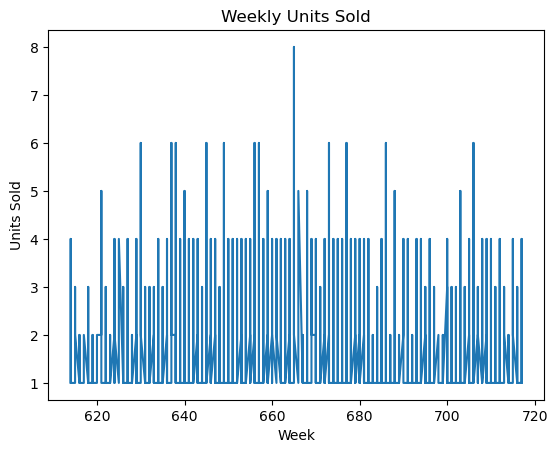

In [ ]:
partThree(partTwo('TransactionData.csv', 11, 'output.csv')) #run partThree funtion to display the plot given transaction data

In [ ]:
def partFour(weeklyUnitSold, fromWeek=664, to=717): #define function with three parameters
    NT = []
    ytMinus1 = weeklyUnitSold.iloc[fromWeek - 2, 1]  #Y(t-1) is the units sold of the week before the start week
    yt = weeklyUnitSold.iloc[fromWeek - 1, 1]

    for week in range(fromWeek, to + 1):
        ytPlus1 = yt + (yt - ytMinus1) #naive trend method
   
        NT.append([week, ytPlus1]) #append week and forecasting result to the list NT
   
        ytMinus1 = yt #update Y(t-1) and Y(t) for the next iteration
        yt = ytPlus1
        
    return NT

In [ ]:
partFour(partTwo('TransactionData.csv', 11, 'output.csv'), 664, 717)

[[664, 1],
 [665, 1],
 [666, 1],
 [667, 1],
 [668, 1],
 [669, 1],
 [670, 1],
 [671, 1],
 [672, 1],
 [673, 1],
 [674, 1],
 [675, 1],
 [676, 1],
 [677, 1],
 [678, 1],
 [679, 1],
 [680, 1],
 [681, 1],
 [682, 1],
 [683, 1],
 [684, 1],
 [685, 1],
 [686, 1],
 [687, 1],
 [688, 1],
 [689, 1],
 [690, 1],
 [691, 1],
 [692, 1],
 [693, 1],
 [694, 1],
 [695, 1],
 [696, 1],
 [697, 1],
 [698, 1],
 [699, 1],
 [700, 1],
 [701, 1],
 [702, 1],
 [703, 1],
 [704, 1],
 [705, 1],
 [706, 1],
 [707, 1],
 [708, 1],
 [709, 1],
 [710, 1],
 [711, 1],
 [712, 1],
 [713, 1],
 [714, 1],
 [715, 1],
 [716, 1],
 [717, 1]]

In [ ]:
def partFive(weeklyUnitSold, n, fromWeek=664, to=717): #define function with three parameters
    MA = []
    
    for week in range(fromWeek, to): #iterate through each week
        total_units = 0
        for i in range(n):
            total_units += weeklyUnitSold.iloc[week - i,1]
        forecasted_value = total_units / n #calculate MA for the current week
        MA.append([week + 1, forecasted_value]) #append to array
        
    return MA

In [ ]:
partFive(partTwo('TransactionData.csv', 11, 'output.csv'), 4, 664, 717)

[[665, 1.0],
 [666, 1.25],
 [667, 1.25],
 [668, 1.25],
 [669, 1.25],
 [670, 1.0],
 [671, 1.0],
 [672, 1.0],
 [673, 1.0],
 [674, 1.0],
 [675, 1.25],
 [676, 1.5],
 [677, 1.5],
 [678, 1.75],
 [679, 1.75],
 [680, 1.75],
 [681, 2.0],
 [682, 2.5],
 [683, 2.25],
 [684, 2.0],
 [685, 1.75],
 [686, 1.25],
 [687, 1.25],
 [688, 1.25],
 [689, 1.25],
 [690, 1.0],
 [691, 1.0],
 [692, 1.0],
 [693, 1.25],
 [694, 1.25],
 [695, 1.75],
 [696, 1.75],
 [697, 1.75],
 [698, 2.0],
 [699, 1.5],
 [700, 1.5],
 [701, 1.25],
 [702, 1.0],
 [703, 1.0],
 [704, 1.25],
 [705, 1.25],
 [706, 1.25],
 [707, 1.25],
 [708, 1.25],
 [709, 1.25],
 [710, 1.5],
 [711, 1.5],
 [712, 1.25],
 [713, 1.5],
 [714, 1.25],
 [715, 1.25],
 [716, 1.25],
 [717, 1.25]]

In [ ]:
def partSix(weeklyUnitSold, a, fromWeek=664, to=717): #define function with three parameters
    ES = []
    
    forecasted_value = weeklyUnitSold.iloc[fromWeek - 1,1]
    
    for week in range(fromWeek, to + 1): #iterate over the range of weeks for forecasting
        forecasted_value = a * weeklyUnitSold.iloc[week - 1,1] + (1 - a) * forecasted_value #calculate the ES for the current week
        
        ES.append([week, forecasted_value]) #append the result to the matrix
        
    return ES

In [ ]:
partSix(partTwo('TransactionData.csv', 11, 'output.csv'), 0.2, 664, 717)

[[664, 1.0],
 [665, 1.0],
 [666, 1.2000000000000002],
 [667, 1.1600000000000001],
 [668, 1.1280000000000001],
 [669, 1.1024],
 [670, 1.08192],
 [671, 1.065536],
 [672, 1.0524288000000002],
 [673, 1.0419430400000003],
 [674, 1.0335544320000003],
 [675, 1.2268435456000004],
 [676, 1.3814748364800002],
 [677, 1.3051798691840002],
 [678, 1.4441438953472003],
 [679, 1.5553151162777605],
 [680, 1.6442520930222084],
 [681, 1.715401674417767],
 [682, 2.1723213395342134],
 [683, 1.9378570716273706],
 [684, 1.7502856573018966],
 [685, 1.6002285258415172],
 [686, 1.6801828206732137],
 [687, 1.544146256538571],
 [688, 1.4353170052308568],
 [689, 1.3482536041846855],
 [690, 1.2786028833477485],
 [691, 1.2228823066781989],
 [692, 1.1783058453425592],
 [693, 1.3426446762740474],
 [694, 1.2741157410192379],
 [695, 1.6192925928153905],
 [696, 1.4954340742523125],
 [697, 1.59634725940185],
 [698, 1.67707780752148],
 [699, 1.541662246017184],
 [700, 1.4333297968137473],
 [701, 1.3466638374509978],
 [702,

In [ ]:
def partSeven(forecastingResults, trueOutcomes): #define function with three parameters
    
    squaredErrorsSum = 0
    
    for i in range(len(forecastingResults)): #iterate over each pair of forecasted and true values
        squaredErrorsSum += (forecastingResults[i][1] - trueOutcomes.iloc[i,1]) ** 2 #compute the squared error for the current pair and add it to the sum
    
    MSE = squaredErrorsSum / len(forecastingResults) # Calculate the mean squared error
        
    return MSE

In [ ]:
def analysisN(itemType): #analysis function for calculating the MSE based on results from n period MA
    NArray = []
    for i in range(3, 6): #for loop for iterating each caluclation with a new n-period value
        NArray.append(partSeven(partFive(partTwo('TransactionData.csv', itemType, 'output.csv'), i, 664, 717), partTwo('TransactionData.csv', itemType, 'output.csv')))
    return NArray

<h1>5) Analysis Results</h1>

In [ ]:
analysisN(5) #analysis function for calculating the MSE based on results from n period MA

[0.018867924528301886, 0.018867924528301886, 0.018867924528301886]

In [ ]:
def analysisA(itemType): #analysis function for calculating the MSE based on results from exponential smoothing
    AArray = []
    for i in range(1, 10): #for loop for iterating through each value of alpha (0.1,0.2,...,0.9)
        value = i / 10.0
        AArray.append(partSeven(partSix(partTwo('TransactionData.csv', itemType, 'output.csv'), value, 664, 717), partTwo('TransactionData.csv', itemType, 'output.csv')))
    
    return AArray

In [ ]:
analysisA(5) #analysis function for calculating the MSE based on results from exponential smoothing

[0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517,
 0.018518518518518517]

In [ ]:
def finalAnalysis():
    analysis = pd.DataFrame({'Item Type': [24,13,2,5], """"'Best 'n' Value'""": [5, 5, 5, """'doesn't matter'"""], 'Best Alpha': [0.1,0.1,0.2,"""'doesn't matter'"""]}) 
    return analysis

In [ ]:
finalAnalysis() #final analysis table to display the best values for n and alpha for each itemType

,Item Type,"""'Best 'n' Value'",Best Alpha
0,24,5,0.1
1,13,5,0.1
2,2,5,0.2
3,5,'doesn't matter','doesn't matter'


<h1>Insights</h1>
<p>Throughout this project we learned how to use python to manipulate and analyze data easily to make future predictions. We succesfully utilized packages that allow us to observe the data and extract points needed to make predicitons for future data. Overall, we not only learned how to use python to analyze data, but to do it efficiently. Dr. Chen can now submit this report to the CEO regarding the status of the stores transactions to recieve his bonus.</p>

<h1>References</h1>
<li>ISE224_LectureNote4_Decision Repetition Structures</li>
<li>ISE224_LectureNote5_Functions</li>
<li>ISE224_LectureNote6_Files and Excemptions</li>
<li>ISE224_LectureNote7-1</li>
<li>ISE224_LectureNote7-2</li>